In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta de 4ª ordem

In [10]:
def RK4(a,b,h,r0,dr0,f):
  tpoints = np.arange(a,b,h)
  rpoints = []

  r = np.array([r0, dr0], dtype=float)
  for t in tpoints:
    rpoints.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t + 0.5*h)
    k3 = h*f(r + 0.5*k2,t + 0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
  return tpoints, rpoints

In [11]:
def Vin(t):
  return (Vpp/2)*np.sin(2*np.pi*freq*t)

def d2Vin(t):
  return -(Vpp/2)*(2*np.pi*freq)**2*np.sin(2*np.pi*freq*t)

def RLCcircuit(r,t):
  Vout = r[0]
  dVoutdt = r[1]
  d2Voutdt2 = d2Vin(t) - R/L*dVoutdt - 1/(L*C)*Vout
  return np.array([dVoutdt, d2Voutdt2], dtype=float)

# RCL - Sinal temporal

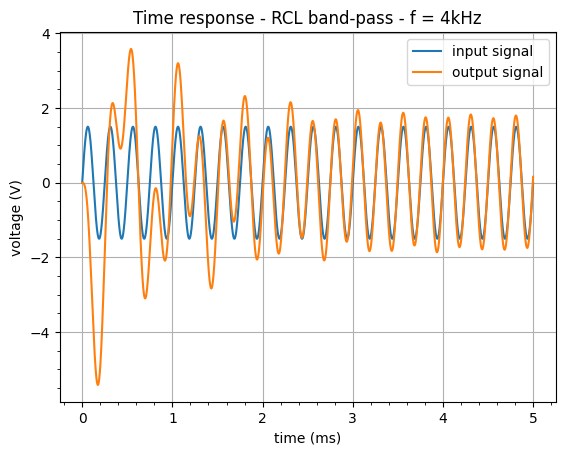

In [4]:
R = 200  #ohms
C = 1e-7 #faraday
L = 0.1  #henry
Vpp = 3
freq = 4000
a = 0    #s
b = 20/freq  #s
N = 10000
h = (b - a)/N

Vinpoints = []
tpoints = np.arange(a,b,h)

for t in (tpoints):
  Vinpoints.append(Vin(t))

rescaledt = [1000*t for t in tpoints]

plt.plot(rescaledt, Vinpoints, label='input signal')

#####################################################################################################################################################################

tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)

plt.title('Time response - RCL band-pass - f = 4kHz')
plt.xlabel('time (ms)')
plt.ylabel('voltage (V)')
plt.grid()
plt.minorticks_on()
plt.plot(rescaledt, Voutpoints, label='output signal')
plt.legend(loc='upper right')
plt.savefig('RCL-4kHz.png', format='png')
plt.show()

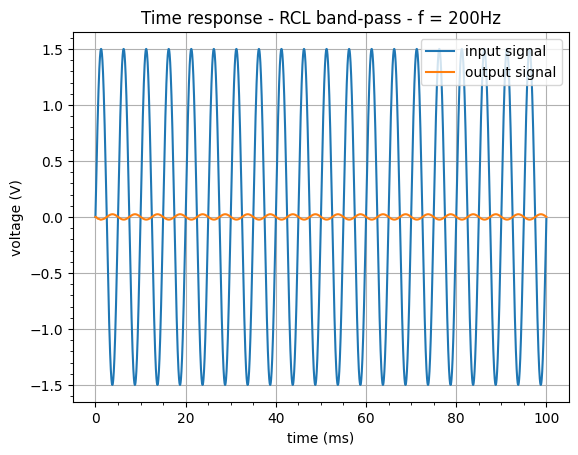

In [5]:
R = 200  #ohms
C = 1e-7 #faraday
L = 0.1  #henry
Vpp = 3
freq = 200
a = 0    #s
b = 20/freq  #s
N = 10000
h = (b - a)/N

Vinpoints = []
tpoints = np.arange(a,b,h)

for t in (tpoints):
  Vinpoints.append(Vin(t))

rescaledt = [1000*t for t in tpoints]

plt.plot(rescaledt, Vinpoints, label='input signal')

#####################################################################################################################################################################

tpoints, Voutpoints = RK4(a,b,h,0,0,RLCcircuit)

plt.title('Time response - RCL band-pass - f = 200Hz')
plt.xlabel('time (ms)')
plt.ylabel('voltage (V)')
plt.grid()
plt.minorticks_on()
plt.plot(rescaledt, Voutpoints, label='output signal')
plt.legend(loc='upper right')
plt.savefig('RCL-200Hz.png', format='png')
plt.show()